In [1]:
from lib.util import *

In [2]:
url_base = 'https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv.gz'
# Lendo bases
df = preprocessing(read_path=url_base, ret=True, exec_time=True)
# df = pd.read_csv(base_path)
df_shape = gpd.read_file(path_to_shapefile)

# Transformações iniciais
df['fatality_rate'] = (df['deaths_by_totalCases']*100).round(2)
df['totalCases_per_100k_inhabitants'] = df['totalCases_per_100k_inhabitants'].round(2)

# Criando caminhos
if not os.path.exists(path_to_write_charts): os.mkdir(path_to_write_charts)

Execution time: 0:03:54.670390


In [3]:
dic_cities = {
    '^[^A-Z]*BAIXA GRANDE[^A-Z]*$': 'Baixa Grande',
    '^[^A-Z]*CAPELA DO ALTO ALEGRE[^A-Z]*$': 'Capela do Alto Alegre',
    '^[^A-Z]*CAPIM GROSSO[^A-Z]*$': 'Capim Grosso',
    '^[^A-Z]*GAVIÃO[^A-Z]*$': 'Gavião',
    '^[^A-Z]*GAVIAO[^A-Z]*$': 'Gavião',
    '^[^A-Z]*IPIRÁ[^A-Z]*$': 'Ipirá',
    '^[^A-Z]*IPIRA[^A-Z]*$': 'Ipirá',
    '^[^A-Z]*MAIRI[^A-Z]*$': 'Mairi',
    '^[^A-Z]*NOVA FÁTIMA[^A-Z]*$': 'Nova Fátima',
    '^[^A-Z]*NOVA FATIMA[^A-Z]*$': 'Nova Fátima',
    '^[^A-Z]*PÉ DE SERRA[^A-Z]*$': 'Pé de Serra',
    '^[^A-Z]*PE DE SERRA[^A-Z]*$': 'Pé de Serra',
    '^[^A-Z]*PINTADAS[^A-Z]*$': 'Pintadas',
    '^[^A-Z]*QUIXABEIRA[^A-Z]*$': 'Quixabeira',
    '^[^A-Z]*RIACHÃO DO JACUÍPE[^A-Z]*$': 'Riachão do Jacuípe',
    '^[^A-Z]*RIACHAO DO JACUIPE[^A-Z]*$': 'Riachão do Jacuípe',
    '^[^A-Z]*SÃO JOSÉ DO JACUÍPE[^A-Z]*$': 'São José do Jacuípe',
    '^[^A-Z]*SAO JOSE DO JACUIPE[^A-Z]*$': 'São José do Jacuípe',
    '^[^A-Z]*SERRA PRETA[^A-Z]*$': 'Serra Preta',
    '^[^A-Z]*VÁRZEA DA ROÇA[^A-Z]*$': 'Várzea da Roça',
    '^[^A-Z]*VARZEA DA ROCA[^A-Z]*$': 'Várzea da Roça',
    '^[^A-Z]*VÁRZEA DO POÇO[^A-Z]*$': 'Várzea do Poço',
    '^[^A-Z]*VARZEA DO POCO[^A-Z]*$': 'Várzea do Poço'
}

def filter_bj(df, city_column):
    global dic_cities
    cidades_bacia_do_jacuipe = list(dic_cities.keys())
    
    df_bacia_jacuipe = df[df[city_column].str.upper().str.contains("|".join(cidades_bacia_do_jacuipe))]
    
    for city_name in dic_cities.keys():
        df_bacia_jacuipe[city_column] = df_bacia_jacuipe[city_column].str.replace(city_name, dic_cities[city_name], regex=True)
    return df_bacia_jacuipe

df_bj = filter_bj(df, 'city')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
# for city in df_bj['city'].unique():
#     df_city = df_bj[df_bj.municipio == city]
#     pop_city = df_city['populacao'].max()
#     df_bj.loc[df_city.index, 'populacao'] = pop_city
df_bj['population'] = df_bj['population'].apply(lambda x: int(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Visualização dos dados de casos de COVID-19 no Território de Identidade Bacia do Jacuípe - BA

In [5]:
print("Dados atualizados em {}".format(get_today().strftime('%d-%m-%Y às %H:%M')))

Dados atualizados em 06-03-2021 às 01:06


Este documento tem o objetivo de analisar e apresentar de forma intuitiva os dados extraídos do repositório no GitHub do pesquisador Wesley Cota [[2]](https://github.com/wcota).

A extração desses dados é feita de forma automática no repositório de Wesley e este, por sua vez, tem o delay desses dados serem atualizados pelo Ministério da Saúde, podendo ter divergências com os dados em tempo real dos municípios.

**OBSERVAÇÃO**: Para fins de análise, serão considerados casos de Covid-19 recuperados aqueles passados de 14 dias desde a data de notificação até a data atual que não foram a óbito.

## Sumário
* [Informações sobre os municípios da Bacia do Jacuípe](#1.-Informa%C3%A7%C3%B5es-Gerais)
* [Dados sobre a COVID-19 no território](#2.-Casos-de-COVID-19-confirmados-para-a-Bacia-do-Jacu%C3%ADpe)
 * [Distribuição dos casos de COVID-19 no território](#2.1-Distribui%C3%A7%C3%A3o-dos-casos-de-COVID-19)
 * [Novos casos registrados](#2.2-Novos-casos-registrados)
 * [Distribuição geográfica da COVID-19 no território](#2.3-Dados-geogr%C3%A1ficos-da-COVID-19-no-territ%C3%B3rio)
* [Dados históricos da COVID-19 na Bacia do Jacuípe](#3.-Dados-hist%C3%B3ricos-da-COVID-19-na-Bacia-do-Jacu%C3%ADpe)
* [Dados históricos da COVID-19 por cidade](#4.-Dados-hist%C3%B3ricos-da-COVID-19-por-cidade)

## 1. Informações Gerais

[Topo da página](#Visualiza%C3%A7%C3%A3o-dos-dados-dos-boletins-da-SESAB-para-os-casos-de-COVID-19-no-Territ%C3%B3rio-de-Identidade-Bacia-do-Jacu%C3%ADpe---BA)

In [6]:
df_bj[['city', 'population']].groupby(by=['city', 'population']).max().sort_values(by=['population'], ascending=False).rename_axis(['Municípios', 'População'])

,
Municípios,População
Ipirá,59595
Riachão do Jacuípe,33436
Capim Grosso,30662
Baixa Grande,20468
Mairi,18676
Serra Preta,14878
Várzea da Roça,14104
Pé de Serra,13578
Capela do Alto Alegre,11637


**Fonte**: SESAB

In [7]:
df_bj_today = df_bj[df_bj['date'] == df_bj['date'].max()]
df_bj_today = df_bj_today.where(df_bj_today.notna(), 0)

## 2. Casos de COVID-19 confirmados para a Bacia do Jacuípe

[Topo da página](#Visualiza%C3%A7%C3%A3o-dos-dados-dos-boletins-da-SESAB-para-os-casos-de-COVID-19-no-Territ%C3%B3rio-de-Identidade-Bacia-do-Jacu%C3%ADpe---BA)

In [8]:
last_boletim = datetime.datetime.strptime(df_bj_today['date'].iloc[0], '%Y-%m-%d').strftime('%d-%m-%Y')

In [9]:
print(f"A Bacia do Jacuípe possui {int(df_bj_today['totalCases'].sum())} casos confirmados até a data {last_boletim}")

A Bacia do Jacuípe possui 13360 casos confirmados até a data 05-03-2021


### 2.1 Distribuição dos casos de COVID-19

[Topo da página](#Visualiza%C3%A7%C3%A3o-dos-dados-dos-boletins-da-SESAB-para-os-casos-de-COVID-19-no-Territ%C3%B3rio-de-Identidade-Bacia-do-Jacu%C3%ADpe---BA)

In [10]:
tmp = df_bj_today.copy()
tmp['%'] = (df_bj_today['totalCases'] / df_bj_today['totalCases'].sum() * 100)

tmp = tmp[['city', 'totalCases', '%']].round(2).sort_values(by=["%"], ascending=False)
tmp = tmp.append(pd.DataFrame({'city': ['TOTAL'], 'totalCases': [tmp['totalCases'].sum()], "%": [round(tmp['%'].sum(), 0)]}))
tmp.index = range(1, tmp.shape[0] + 1)
tmp['%'] = tmp['%'].apply(lambda x: str(x) + "%")
tmp['totalCases'] = tmp['totalCases'].apply(lambda x: int(x))
tmp.rename(columns={'city': 'Município', 'totalCases': 'Total de casos confirmados', '%': 'Porcentagem'})

,Município,Total de casos confirmados,Porcentagem
1,Capim Grosso,2782,20.82%
2,Riachão do Jacuípe,2320,17.37%
3,Ipirá,1311,9.81%
4,Pé de Serra,1222,9.15%
5,Pintadas,877,6.56%
6,Várzea da Roça,790,5.91%
7,Mairi,778,5.82%
8,Capela do Alto Alegre,644,4.82%
9,Quixabeira,478,3.58%
10,Baixa Grande,433,3.24%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


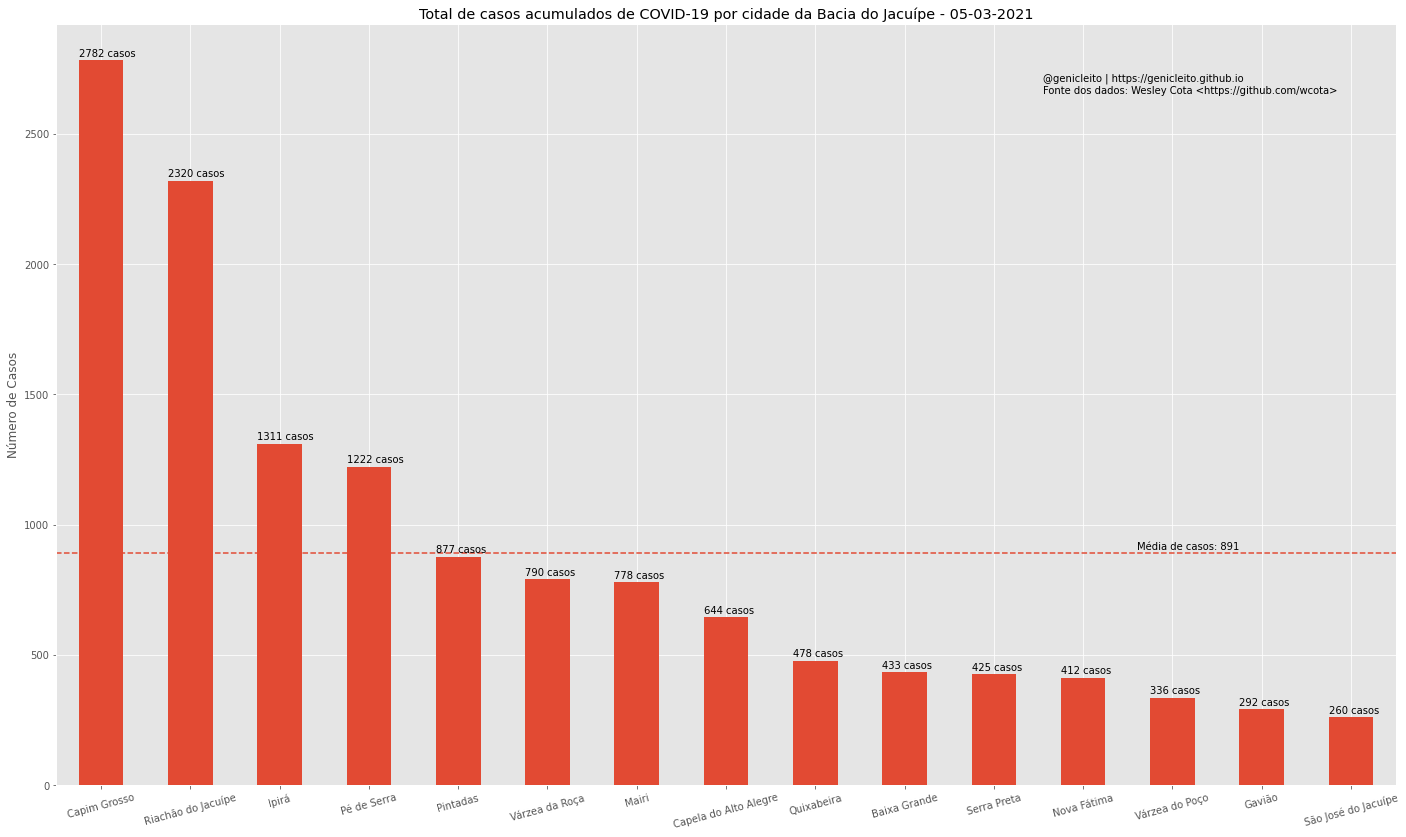

In [11]:
col = 'totalCases'
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(24, 14))

tmp = df_bj_today.sort_values(by=['date', col], ascending=False)[df_bj_today[col] > 0]
dt = tmp['date'].iloc[0]
tmp = tmp[tmp['date'] == dt].set_index(['city'])[[col]]

tmp.plot(title="Total de casos acumulados de COVID-19 por cidade da Bacia do Jacuípe - {}".format(last_boletim), ax=ax, kind='bar', legend=False, rot=15)

for i in range(tmp.shape[0]):
    ax.annotate('{} {}'.format(int(tmp[col].iloc[i]), 'caso' if tmp[col].iloc[i] == 1 else 'casos'), xy=(i - 0.25, tmp[col].iloc[i] + 15))

mean = int(round(tmp[col].mean(), 0))
ax.hlines(mean, ax.get_xlim()[0], ax.get_xlim()[1], linestyles='dashed')
ax.annotate('Média de casos: {}'.format(mean), (ax.get_xlim()[1] / 1.25, mean + 15))

ax.set_xlabel("")
ax.set_ylabel("Número de Casos")
ax.annotate('@genicleito | https://genicleito.github.io\nFonte dos dados: Wesley Cota <https://github.com/wcota>', (ax.get_xlim()[1] / 1.375, ax.get_ylim()[1] / 1.1))
# plt.savefig(path_to_write_charts + "total_casos_acumulados_territorio_barras.svg", format='svg', dpi=1000)
plt.show()

**Fonte**: Wesley Cota <https://github.com/wcota>

### 2.2 Novos casos registrados

[Topo da página](#Visualiza%C3%A7%C3%A3o-dos-dados-dos-boletins-da-SESAB-para-os-casos-de-COVID-19-no-Territ%C3%B3rio-de-Identidade-Bacia-do-Jacu%C3%ADpe---BA)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


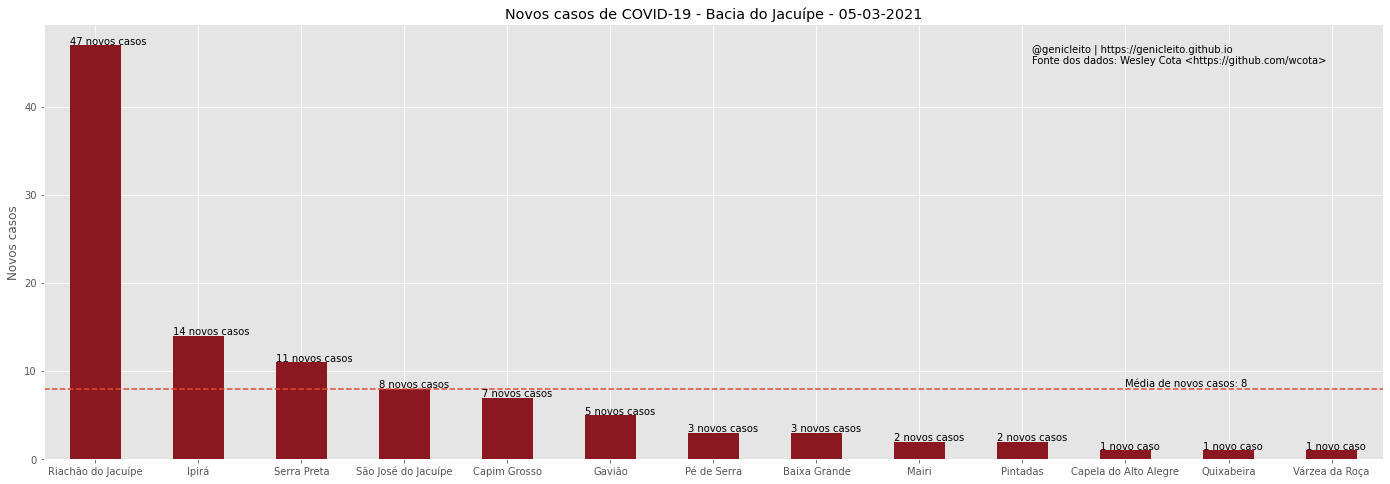

In [12]:
for col in ['newCases']:
    tmp = df_bj_today.sort_values(by=['date', col], ascending=False)[df_bj_today['newCases'] > 0]
    
    if tmp.shape[0] == 0:
        print(f"Nenhum caso novo registrado para o dia {today}")
    else:
        plt.style.use('ggplot')
        f, ax = plt.subplots(figsize=(24, 8))
        
        dt = tmp['date'].iloc[0]
        tmp = tmp[tmp['date'] == dt].set_index(['city'])[[col]]

        tmp.plot(title="Novos casos de COVID-19 - Bacia do Jacuípe - {}".format(last_boletim), ax=ax, kind='bar', legend=False, rot=0, color='#8b1820')

        for i in range(tmp.shape[0]):
            ax.annotate('{} {}'.format(int(tmp['newCases'].iloc[i]), 'novo caso' if tmp['newCases'].iloc[i] == 1 else 'novos casos'), xy=(i - 0.25, tmp['newCases'].iloc[i] + 0.1))

        mean = int(round(tmp['newCases'].mean(), 0))
        ax.hlines(mean, ax.get_xlim()[0], ax.get_xlim()[1], linestyles='dashed')
        ax.annotate('Média de novos casos: {}'.format(mean), (ax.get_xlim()[1] / 1.25, mean + 0.25))

        ax.set_xlabel("")
        ax.set_ylabel("Novos casos")
        ax.annotate('@genicleito | https://genicleito.github.io\nFonte dos dados: Wesley Cota <https://github.com/wcota>', (ax.get_xlim()[1] / 1.375, ax.get_ylim()[1] / 1.1))
        # plt.savefig(path_to_write_charts + col.replace("í", "i").replace("á", "a").replace("õ", "o").replace("é", "e").replace("ã", "a").replace("ç", "c") + ".svg", format='svg', dpi=1000)
        plt.show()

### 2.3 Dados geográficos da COVID-19 no território

[Topo da página](#Visualiza%C3%A7%C3%A3o-dos-dados-dos-boletins-da-SESAB-para-os-casos-de-COVID-19-no-Territ%C3%B3rio-de-Identidade-Bacia-do-Jacu%C3%ADpe---BA)

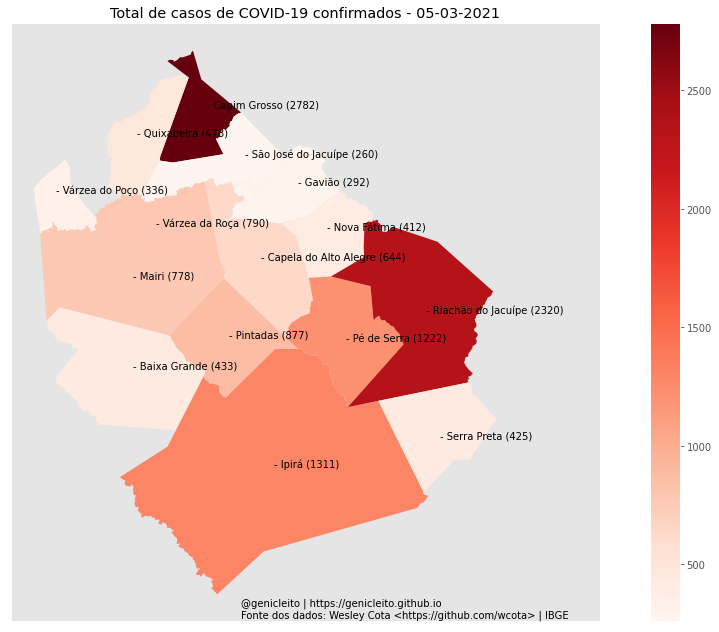

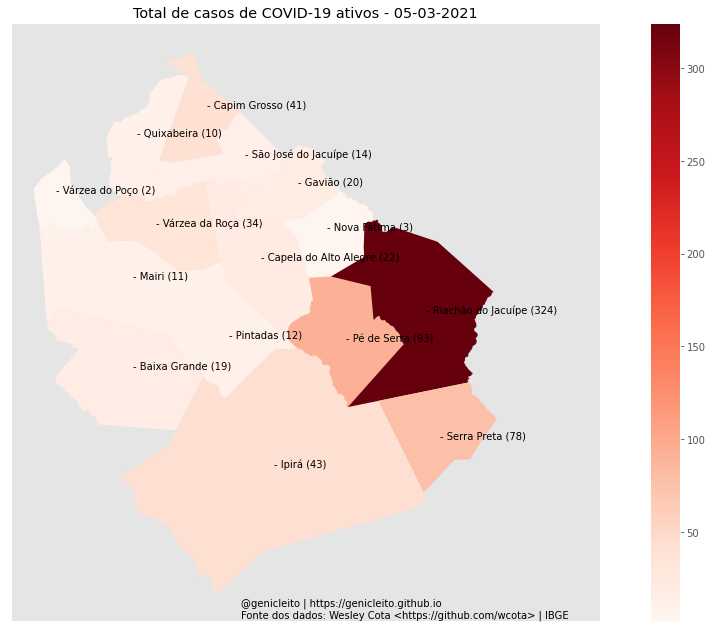

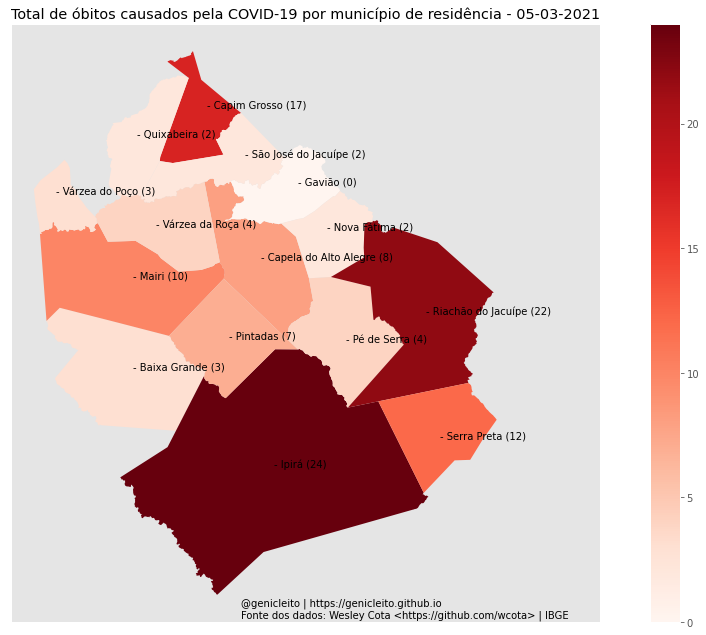

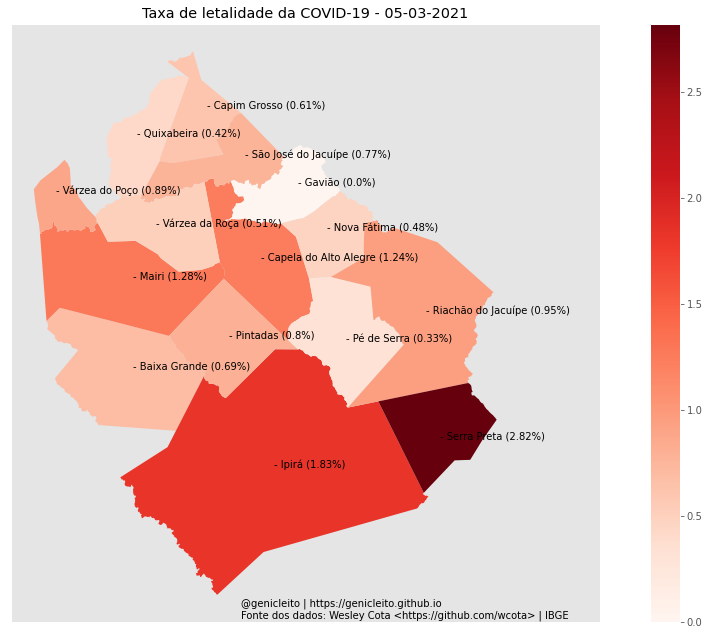

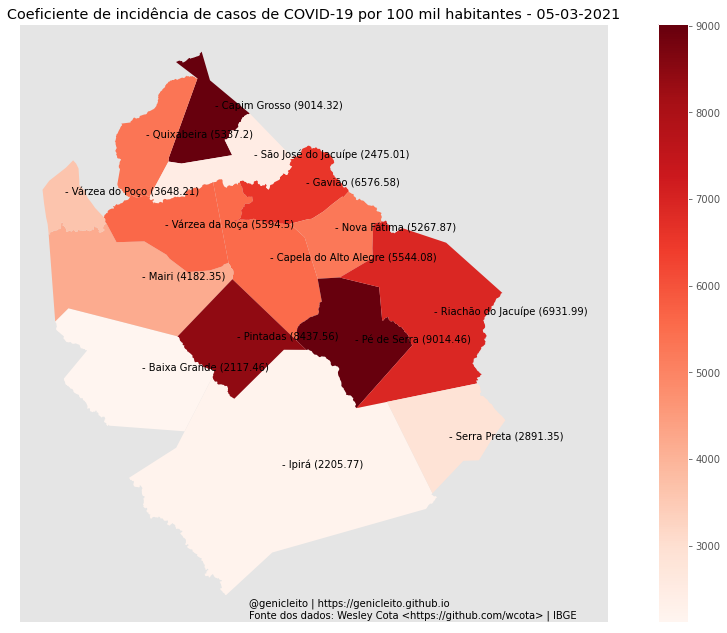

In [13]:
describe_columns = {
    'totalCases': 'Total de casos de COVID-19 confirmados',
    'activeCases': 'Total de casos de COVID-19 ativos',
    'deaths': 'Total de óbitos causados pela COVID-19 por município de residência',
    'fatality_rate': 'Taxa de letalidade da COVID-19',
    'totalCases_per_100k_inhabitants': 'Coeficiente de incidência de casos de COVID-19 por 100 mil habitantes'
}

for col in describe_columns.keys():
    f, ax = plt.subplots(figsize=(18, 11))
    
    tmp = df_shape.rename(columns={'NM_MUNICIP': 'city'}).merge(df_bj_today[['city', col]], on=['city'], how='left')
    tmp['coords'] = tmp['geometry'].apply(lambda x: x.representative_point().coords[0])
    tmp[col] = pd.to_numeric(tmp[col].where(tmp[col].notnull(), 0), downcast='integer')

    tmp.plot(legend=True, column=col, cmap='Reds', ax=ax)

    for i in range(tmp.shape[0]):
        ax.annotate('- {} ({}{})'.format(tmp['city'].iloc[i], tmp[col].iloc[i], "%" if col == 'fatality_rate' else ""), xy=tmp['coords'].iloc[i])

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(describe_columns[col] + " - " + last_boletim)
    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + 0.2)
    ax.annotate('@genicleito | https://genicleito.github.io\nFonte dos dados: Wesley Cota <https://github.com/wcota> | IBGE', (ax.get_xlim()[1] - 0.9, ax.get_ylim()[0] + 0.01))
    # plt.savefig(path_to_write_charts + "mapa_" + col + ".svg", format='svg', dpi=1000)
    plt.plot()

O coeficiente de incidência por 100 mil habitantes mede a incidência de casos de COVID-19 para cada 100 mil habitantes (obtido pela divisão do número de casos da localidade pela população vezes 100 mil).

Esse é uma forma mais justa de comparação do número de casos dos territórios pois todos têm como referência 100 mil habitantes com relação à população real.

## 3. Dados históricos da COVID-19 na Bacia do Jacuípe

[Topo da página](#Visualiza%C3%A7%C3%A3o-dos-dados-dos-boletins-da-SESAB-para-os-casos-de-COVID-19-no-Territ%C3%B3rio-de-Identidade-Bacia-do-Jacu%C3%ADpe---BA)

### 3.1 Dados históricos

In [14]:
def plot(df, city="", columns=['date', 'totalCases', 'activeCases', 'recoveredCases', 'newCases', 'deaths'], save_path=None):#), save_path=path_to_write_charts):
    plt.style.use('ggplot')
    dic_variables = {'activeCases': 'Total de casos ativos', 'totalCases': 'Total de casos confirmados', 'newCases': 'Novos casos', 'recoveredCases': 'Total de recuperados', 'deaths': 'Total de óbitos', 'movingAverage7': 'Média móvel de casos (7 períodos)'}
    
    f, ax = plt.subplots(figsize=(24, 12))
    tmp = df[columns]
    tmp['date'] = pd.to_datetime(tmp['date'])

    ax.plot(tmp['date'], tmp[[x for x in columns if x != 'date']], 'o', ls="-")

    colors = ['blue', 'yellow', 'green', 'orange', 'red', 'grey']
    for i, l in enumerate(ax.get_lines()):
        # if i == len(ax.get_lines())-1: # movindAverage7
            # l.set_marker("")
        l.set_color(colors[i])

    tmp = tmp.sort_values(by=['date'])

    ax.set_xlabel("Data")
    ax.set_ylabel("Número de casos")
    ax.legend([dic_variables[x] for x in tmp.columns[1:]])
    # ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='x')
    ax.set_title("Casos acumulados de COVID-19{} - BA - Até: {}".format(" - " + city, last_boletim))

    # Define the date format
    date_form = DateFormatter("%d-%m")
    ax.xaxis.set_major_formatter(date_form)
    plt.draw()

    p = (datetime.datetime.strptime(ax.get_xticklabels()[-1].get_text() + '-2020', "%d-%m-%Y") - tmp['date'].max()).days
#     for col in tmp.columns[1:]:
#         if not col.startswith('movingAverage'):
#             ax.annotate("  {}".format(int(tmp[col].iloc[-1])), xy=(ax.get_xticks()[-1] - p, tmp[col].iloc[-1]))
    
    ax.set_ylim(-0.05*ax.get_ylim()[1], ax.get_ylim()[1] + 0.01 * ax.get_ylim()[1])
    ax.annotate('@genicleito | https://genicleito.github.io\nFonte dos dados: Wesley Cota <https://github.com/wcota>', (ax.get_xlim()[0] + 0.01 * (ax.get_xlim()[1] - ax.get_xlim()[0]), ax.get_ylim()[1]/1.3))
    if save_path: plt.savefig(save_path + "total_casos_acumulados_" + city.lower().replace(" ", "_").replace("í", "i").replace("á", "a").replace("õ", "o").replace("é", "e").replace("ã", "a").replace("ç", "c") + ".svg", format='svg', dpi=1000)
    plt.show()
    

In [15]:
columns_to_describe = ['totalCases', 'activeCases', 'recoveredCases', 'deaths', 'newCases']

Gráfico com os dados históricos de COVID-19 da Bacia do Jacuípe

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


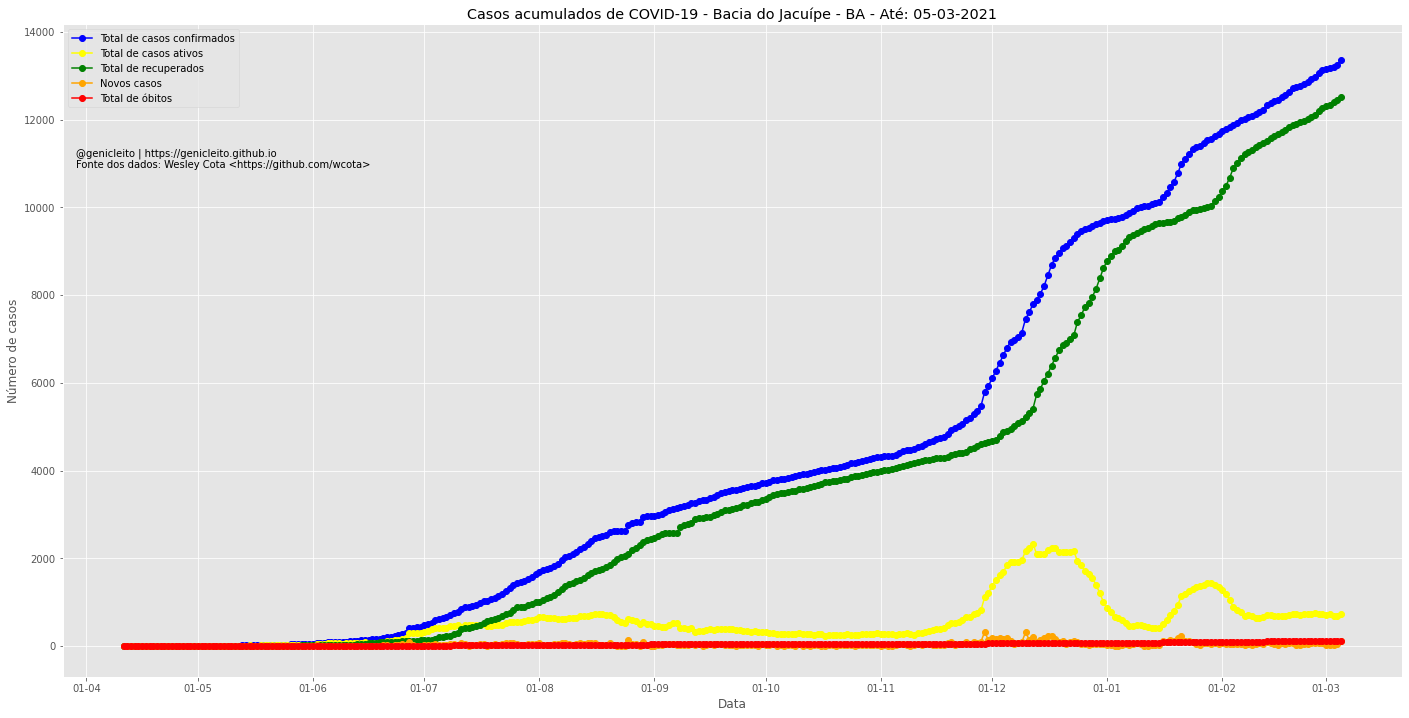

In [16]:
df_bj_grouped = df_bj[['date'] + columns_to_describe + ['newDeaths']].groupby(by=['date']).sum().reset_index()
# plot(df_bj_grouped.assign(movingAverage7=df_bj_grouped['totalCases'].rolling(7).mean().fillna(0)), city='Bacia do Jacuípe')
plot(df_bj_grouped, city='Bacia do Jacuípe')

Tabela com medidas dos dados históricos de COVID-19 da Bacia do Jacuípe

In [17]:
tmp = df_bj_grouped.rename(columns={'totalCases': 'Confirmados', 'activeCases': 'Casos ativos', 'recoveredCases': 'Recuperados', 'newCases': 'Novos Casos', 'newDeaths': 'Novos óbitos', 'deaths': 'Óbitos por município de residência'})
tmp.describe().loc[['50%', 'max'], :].rename(index={'50%': 'Mediana', 'max': "Máximo"}).astype(int)

,Confirmados,Casos ativos,Recuperados,Óbitos por município de residência,Novos Casos,Novos óbitos
Mediana,3546,430,3123,43,29,0
Máximo,13360,2326,12514,120,326,4


In [18]:
print("")

Situação atual do número de casos de coronavírus

In [19]:
tmp = df_bj_grouped.rename(columns={'totalCases': 'Confirmados', 'activeCases': 'Casos ativos', 'recoveredCases': 'Recuperados', 'newCases': 'Novos Casos', 'newDeaths': 'Novos óbitos', 'deaths': 'Óbitos por município de residência'})
tmp = tmp[tmp['date'] == tmp['date'].max()][tmp.columns[1:]].T.astype(int)
tmp.rename(columns={tmp.columns[0]: 'Situação da COVID-19 na Bacia do Jacuípe na data {}'.format(last_boletim)})

,Situação da COVID-19 na Bacia do Jacuípe na data 05-03-2021
Confirmados,13360
Casos ativos,726
Recuperados,12514
Óbitos por município de residência,120
Novos Casos,105
Novos óbitos,0


### 3.2 Informações dos dados acumulados por cidade

[Topo da página](#Visualiza%C3%A7%C3%A3o-dos-dados-dos-boletins-da-SESAB-para-os-casos-de-COVID-19-no-Territ%C3%B3rio-de-Identidade-Bacia-do-Jacu%C3%ADpe---BA)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


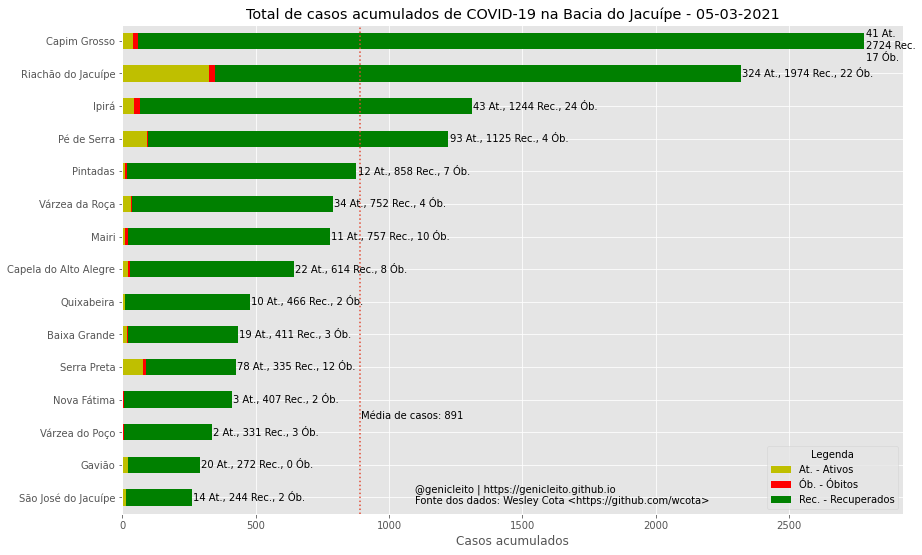

In [20]:
dic = {'totalCases': 'At. - Ativos', 'deaths': 'Ób. - Óbitos', 'recoveredCases': 'Rec. - Recuperados'}

tmp = df_bj_today.where(df_bj_today.notna(), 0).sort_values(by=['totalCases'])
mean = int(round(tmp['totalCases'].mean(), 0))
tmp['city'] = tmp['city'].str.replace("\/[A-Z]+$", '')
tmp = tmp[['city', 'totalCases', 'deaths', 'recoveredCases', 'activeCases']].set_index('city')
tmp['totalCases'] = tmp['totalCases'] - tmp['deaths'] - tmp['recoveredCases']

ativos = tmp['activeCases']
tmp = tmp.drop('activeCases', axis=1)

plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(14, 9))

tmp.plot(title="Total de casos acumulados de COVID-19 na Bacia do Jacuípe - {}".format(last_boletim), ax=ax, kind='barh', color=['y', 'r', 'g'], stacked=True)

tmp['totalCases'] = tmp['totalCases'] + tmp['deaths'] + tmp['recoveredCases']

ax.legend([dic[x] for x in tmp.columns], title="Legenda")

ax.vlines(mean, ax.get_ylim()[0], ax.get_ylim()[1], linestyles='dotted')
ax.annotate('Média de casos: {}'.format(mean), (mean + 5, ax.get_ylim()[1] / 6))

xy = [(tmp['deaths'].iloc[i], tmp['totalCases'].iloc[i], tmp['recoveredCases'].iloc[i], ativos.iloc[i]) for i in range(tmp.shape[0])]
for i, x in enumerate(xy):
    if x[1] == tmp['totalCases'].max():
        ax.annotate("{} {}\n{} {}\n{} {}".format(int(x[3]), "At.", int(x[2]), "Rec.", int(x[0]), "Ób."), xy=(x[1] + 5, i - 0.6))
    else:
        ax.annotate("{} {}, {} {}, {} {}".format(int(x[3]), "At.", int(x[2]), "Rec.", int(x[0]), "Ób."), xy=(x[1] + 5, i - 0.1))

ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + 7)
ax.set_ylabel("")
ax.set_xlabel("Casos acumulados")
ax.annotate('@genicleito | https://genicleito.github.io\nFonte dos dados: Wesley Cota <https://github.com/wcota>', (0.375 * ax.get_xlim()[1], - .2))

# plt.savefig(path_to_write_charts + "compilado_casos_cidades_barh.svg", format='svg', dpi=1000)
plt.show()

## 4. Dados históricos da COVID-19 por cidade

[Topo da página](#Visualiza%C3%A7%C3%A3o-dos-dados-dos-boletins-da-SESAB-para-os-casos-de-COVID-19-no-Territ%C3%B3rio-de-Identidade-Bacia-do-Jacu%C3%ADpe---BA)

Abaixo são exibidos os dados históricos agregados (acumulados ao longo do tempo até a data mais recente) dos municípios que compõem a Bacia do Jacuípe.

Abaixo estão os gráficos para cada município acopanhados de uma tabela com os valores de **mediana** e **máximo** para os `novos casos`, `casos confirmados`, `casos ativos`, `casos recuperados`, `óbitos por município de residência` e `novos óbitos`.



Dados históricos da COVID-19 no município de Baixa Grande


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


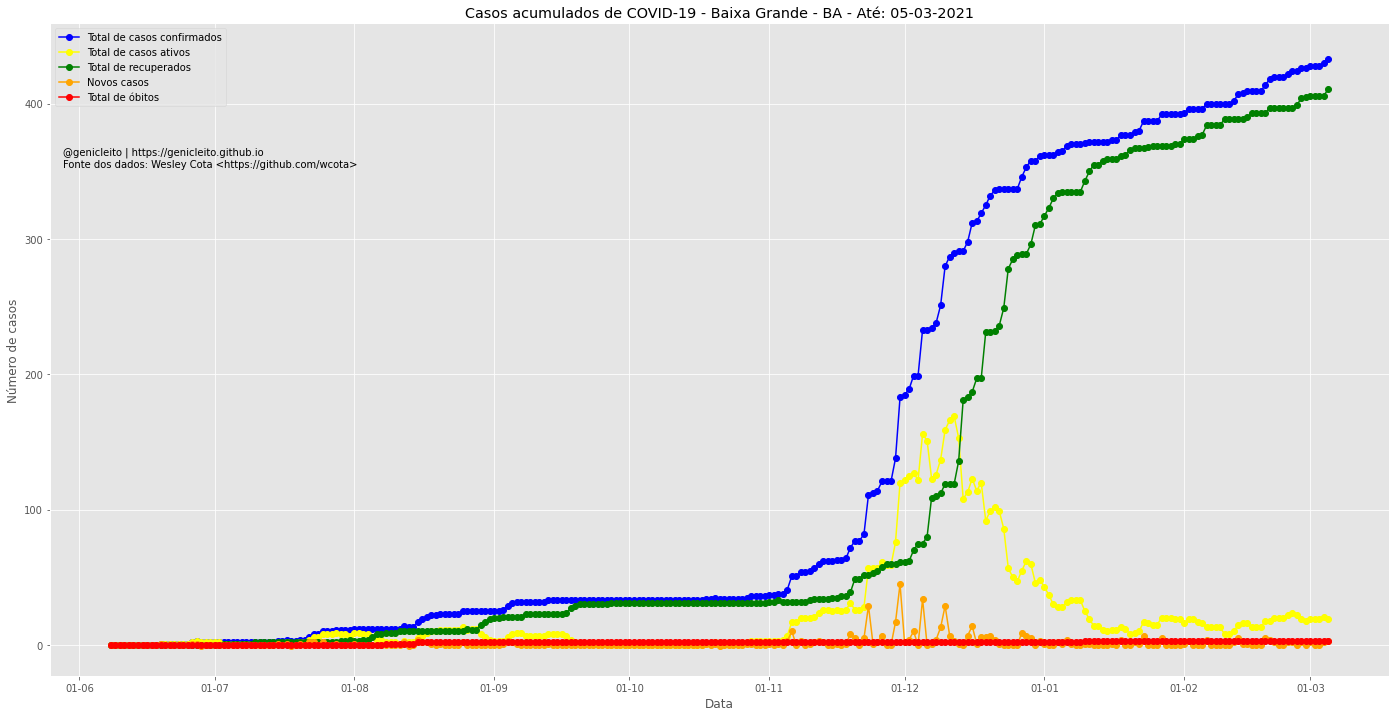



Tabela com medidas dos dados históricos da COVID-19 em Baixa Grande


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,34,8,31,2,0
Máximo,433,169,411,3,45








Dados históricos da COVID-19 no município de Capela do Alto Alegre


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


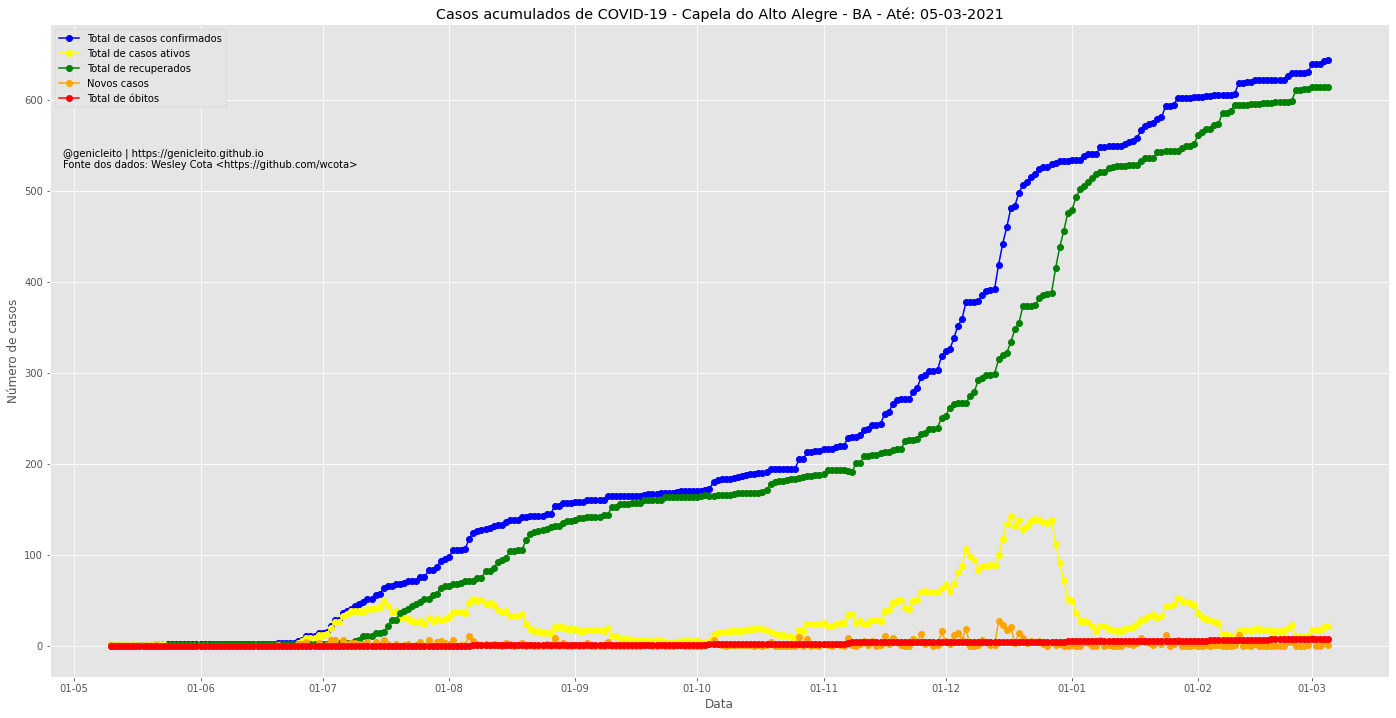



Tabela com medidas dos dados históricos da COVID-19 em Capela do Alto Alegre


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,182,20,166,2,1
Máximo,644,143,614,8,27








Dados históricos da COVID-19 no município de Capim Grosso


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


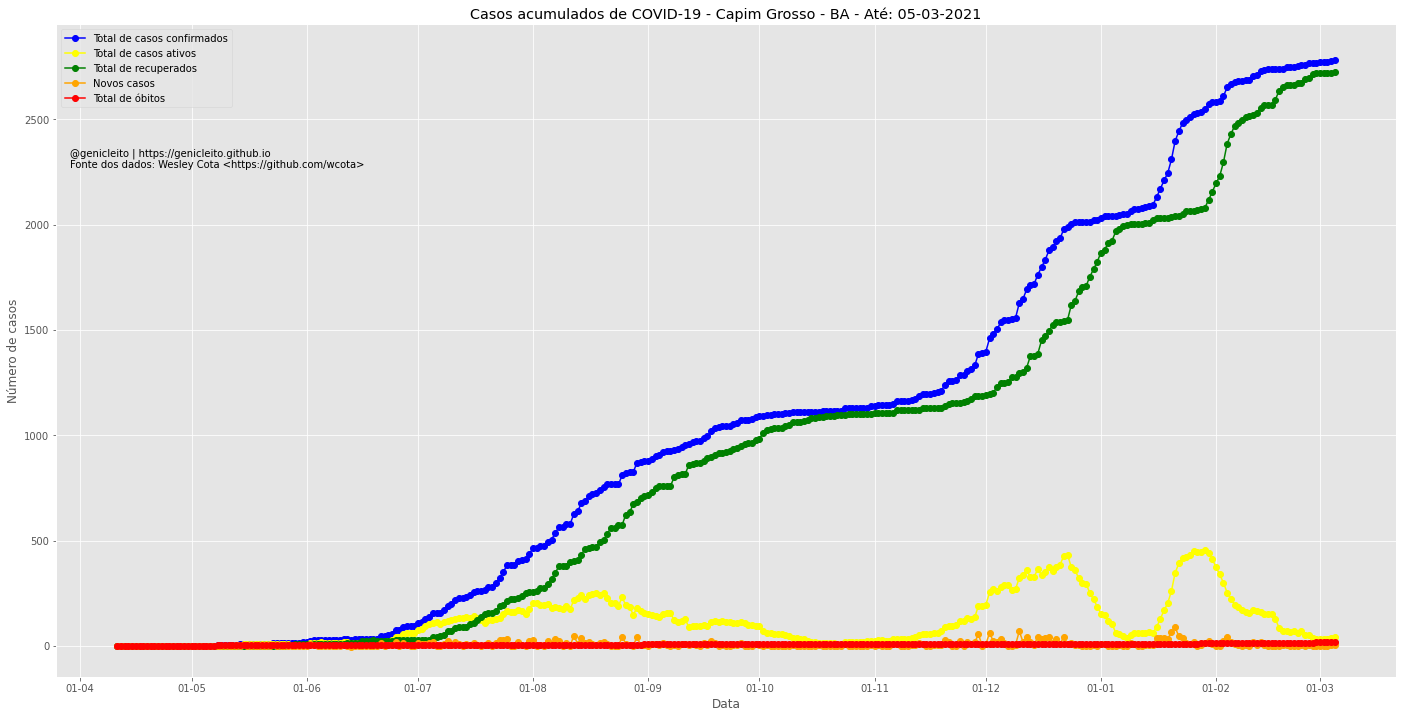



Tabela com medidas dos dados históricos da COVID-19 em Capim Grosso


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,1044,94,922,10,2
Máximo,2782,454,2724,17,88








Dados históricos da COVID-19 no município de Gavião


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


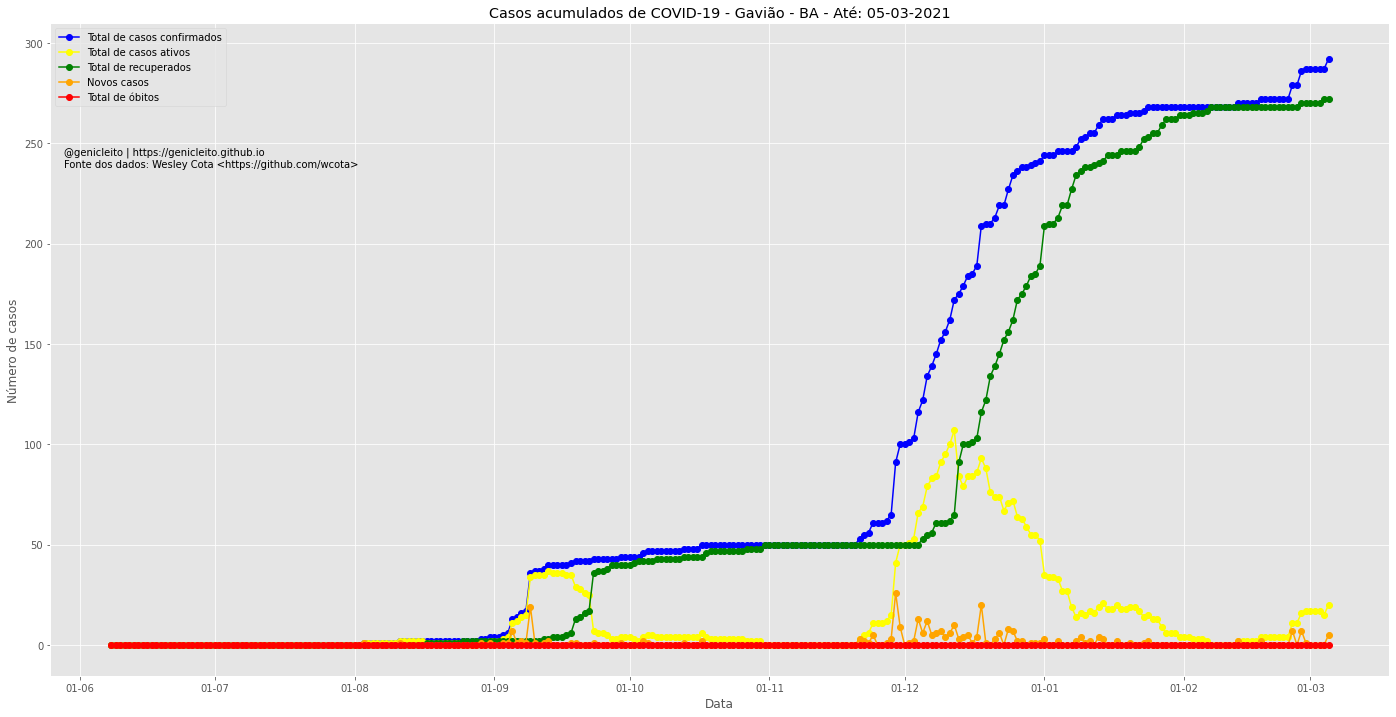



Tabela com medidas dos dados históricos da COVID-19 em Gavião


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,50,3,47,0,0
Máximo,292,107,272,0,26








Dados históricos da COVID-19 no município de Ipirá


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


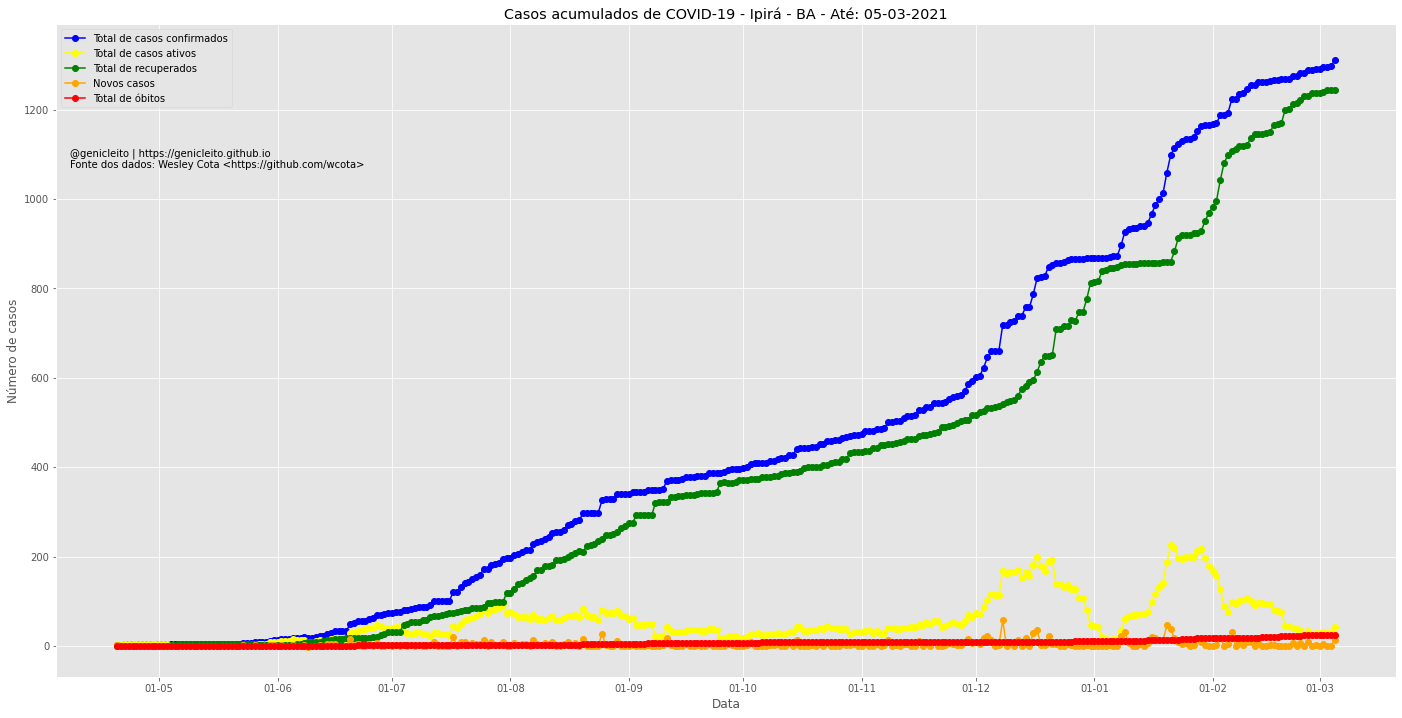



Tabela com medidas dos dados históricos da COVID-19 em Ipirá


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,391,41,365,6,1
Máximo,1311,225,1244,24,58








Dados históricos da COVID-19 no município de Mairi


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


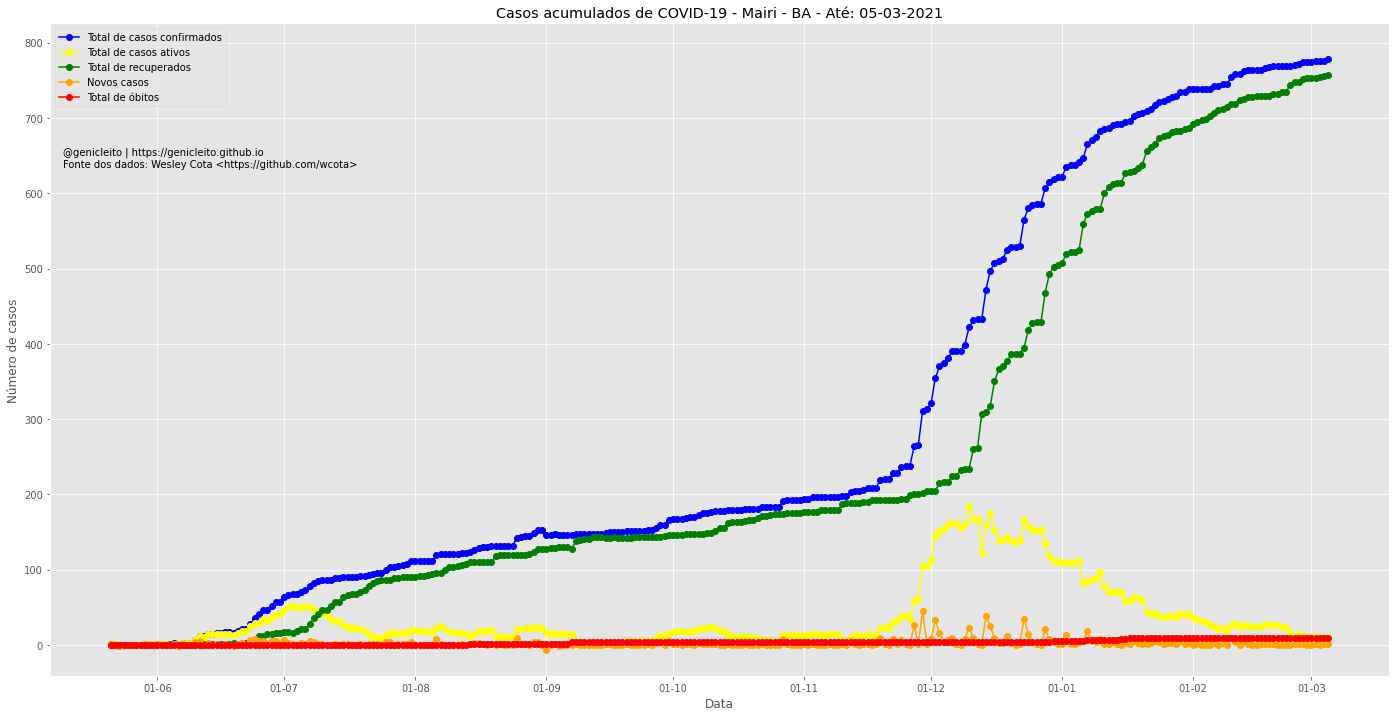



Tabela com medidas dos dados históricos da COVID-19 em Mairi


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,178,19,156,4,1
Máximo,778,184,757,10,45








Dados históricos da COVID-19 no município de Nova Fátima


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


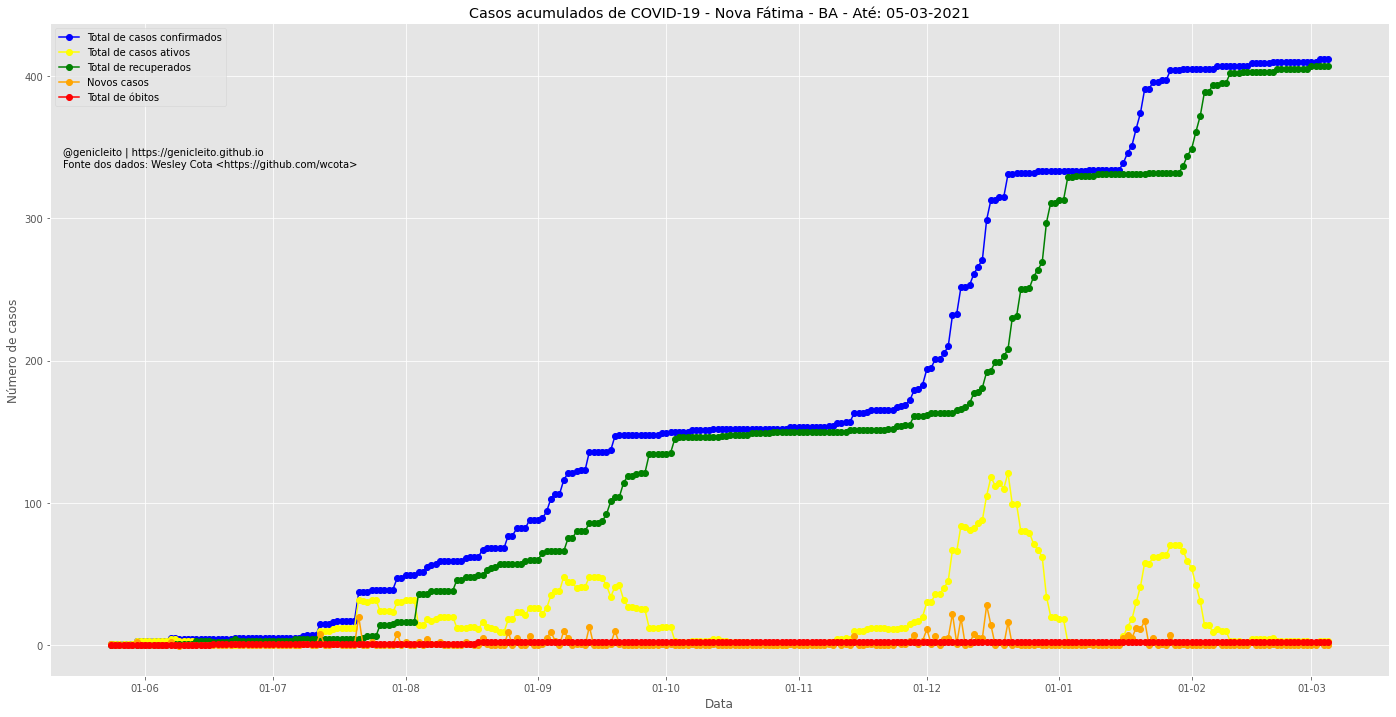



Tabela com medidas dos dados históricos da COVID-19 em Nova Fátima


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,152,11,146,2,0
Máximo,412,121,407,2,28








Dados históricos da COVID-19 no município de Pintadas


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


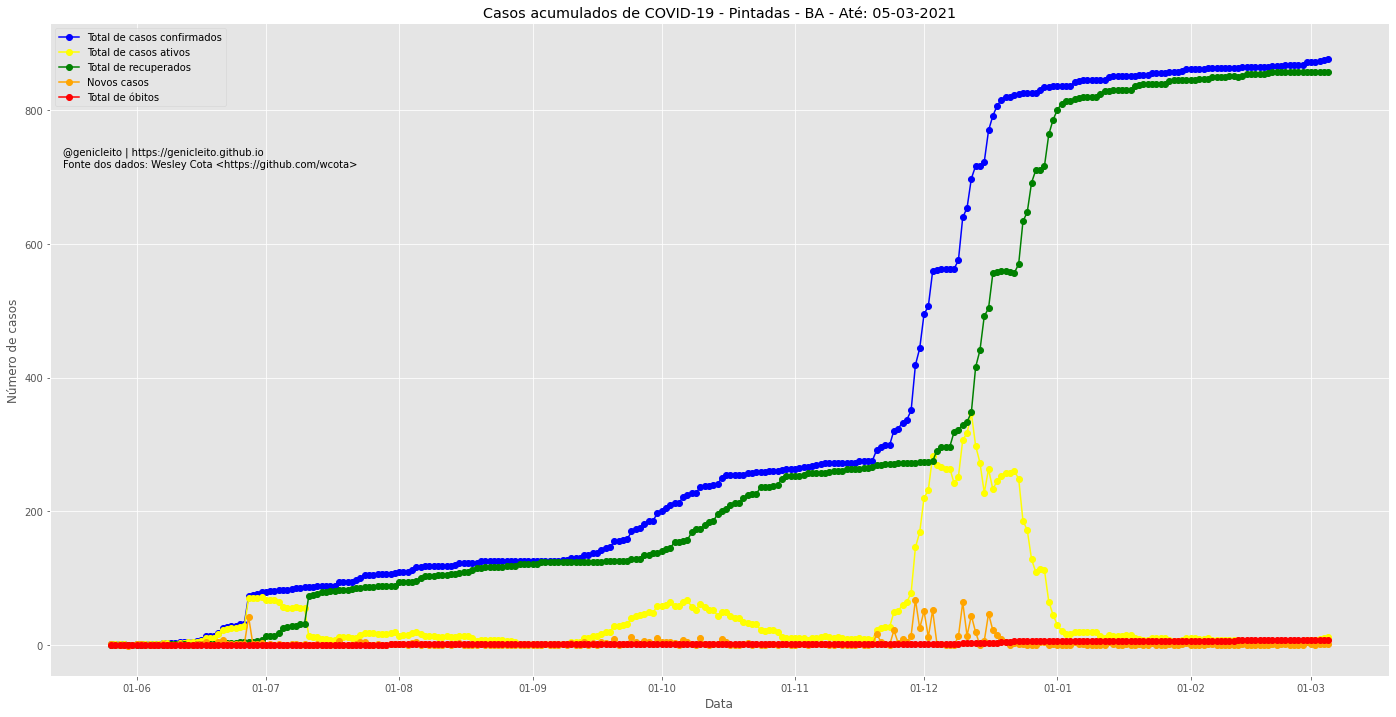



Tabela com medidas dos dados históricos da COVID-19 em Pintadas


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,245,13,198,1,0
Máximo,877,347,858,7,68








Dados históricos da COVID-19 no município de Pé de Serra


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


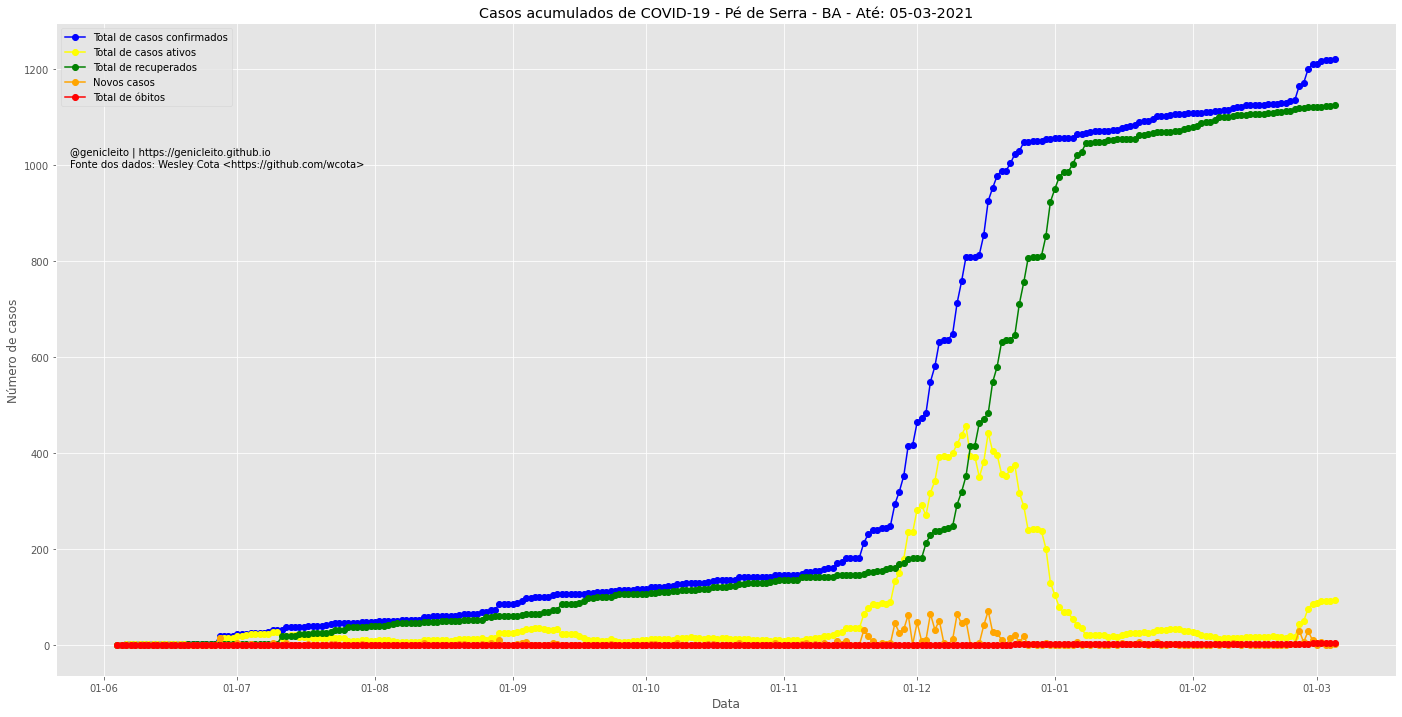



Tabela com medidas dos dados históricos da COVID-19 em Pé de Serra


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,136,16,122,0,1
Máximo,1222,456,1125,4,71








Dados históricos da COVID-19 no município de Quixabeira


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


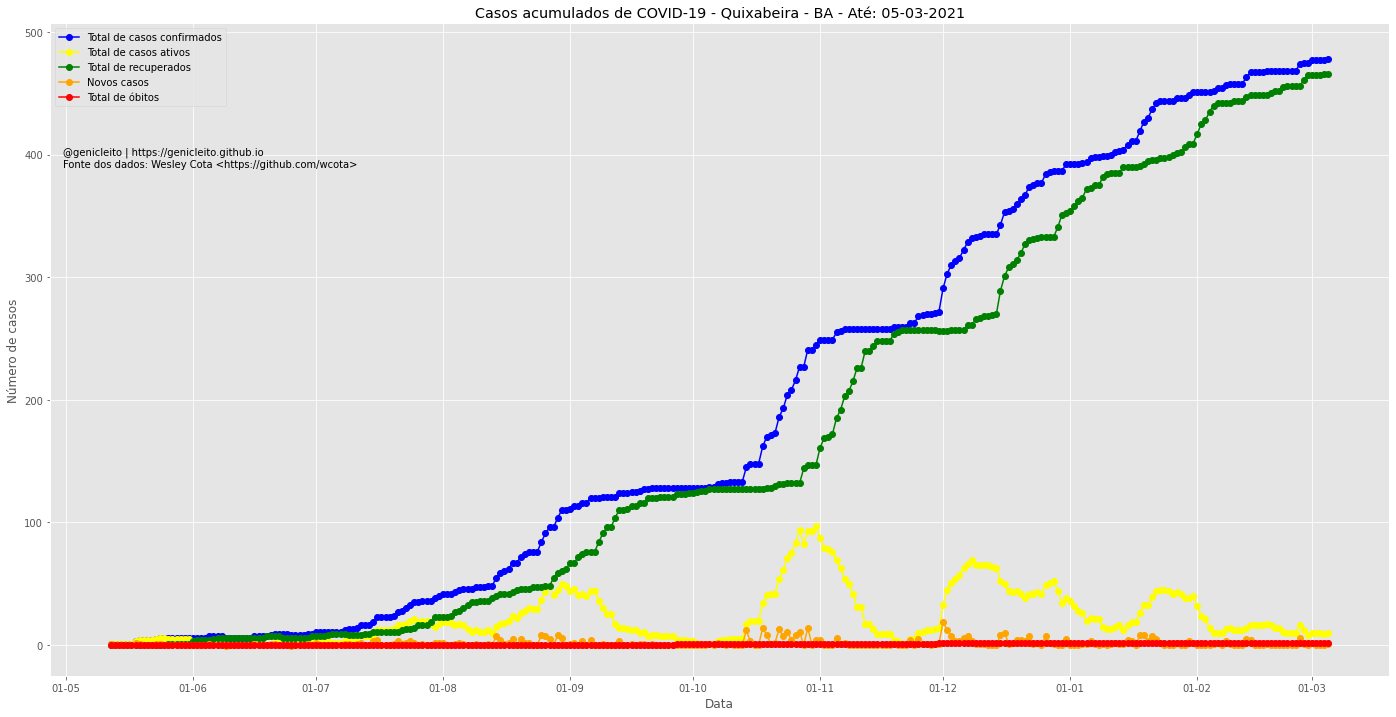



Tabela com medidas dos dados históricos da COVID-19 em Quixabeira


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,131,14,127,1,0
Máximo,478,97,466,2,19








Dados históricos da COVID-19 no município de Riachão do Jacuípe


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


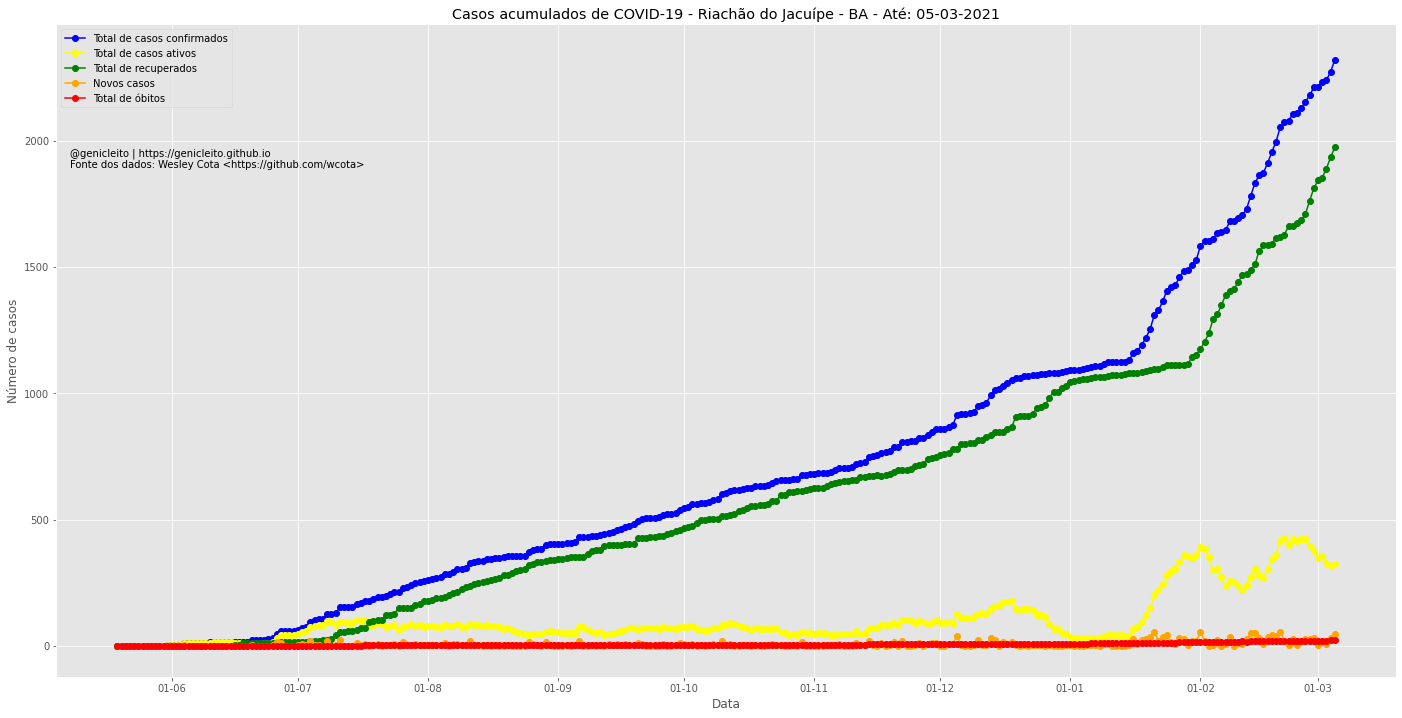



Tabela com medidas dos dados históricos da COVID-19 em Riachão do Jacuípe


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,605,74,516,6,4
Máximo,2320,428,1974,22,57








Dados históricos da COVID-19 no município de Serra Preta


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


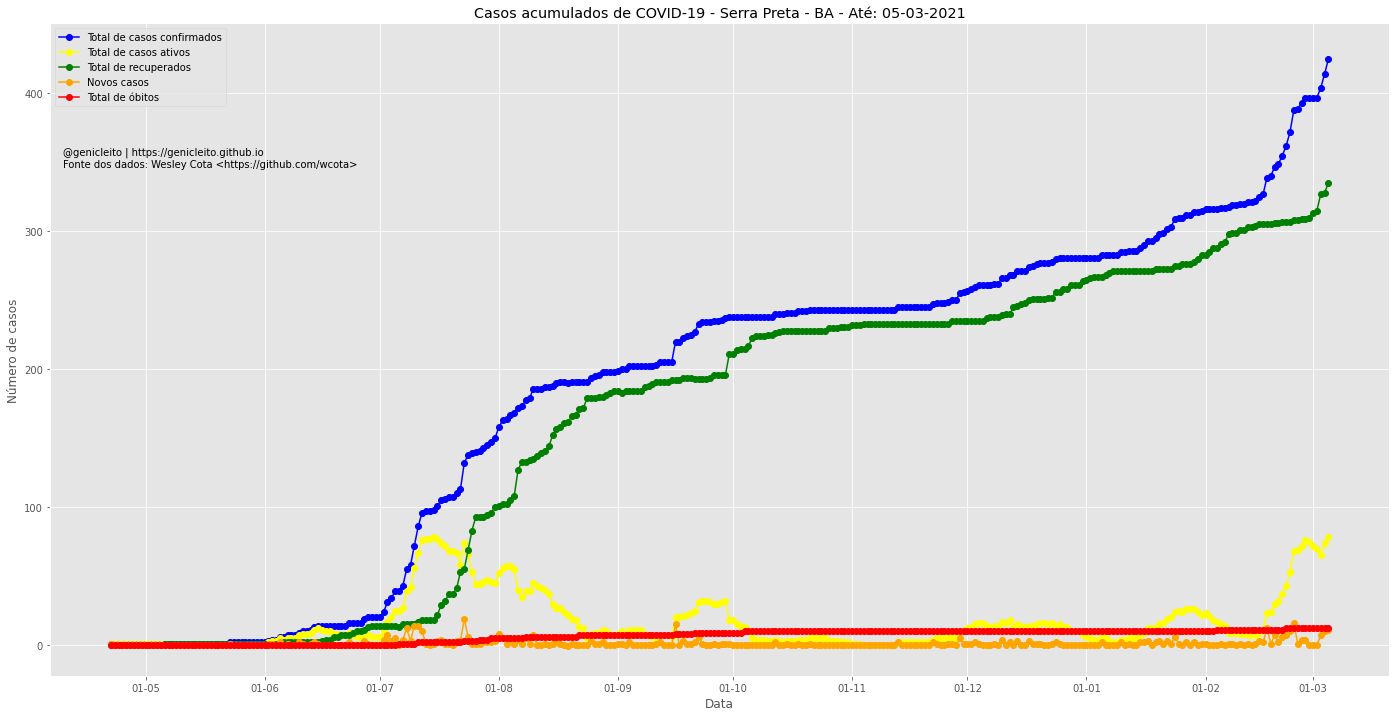



Tabela com medidas dos dados históricos da COVID-19 em Serra Preta


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,235,9,196,9,0
Máximo,425,78,335,12,19








Dados históricos da COVID-19 no município de São José do Jacuípe


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


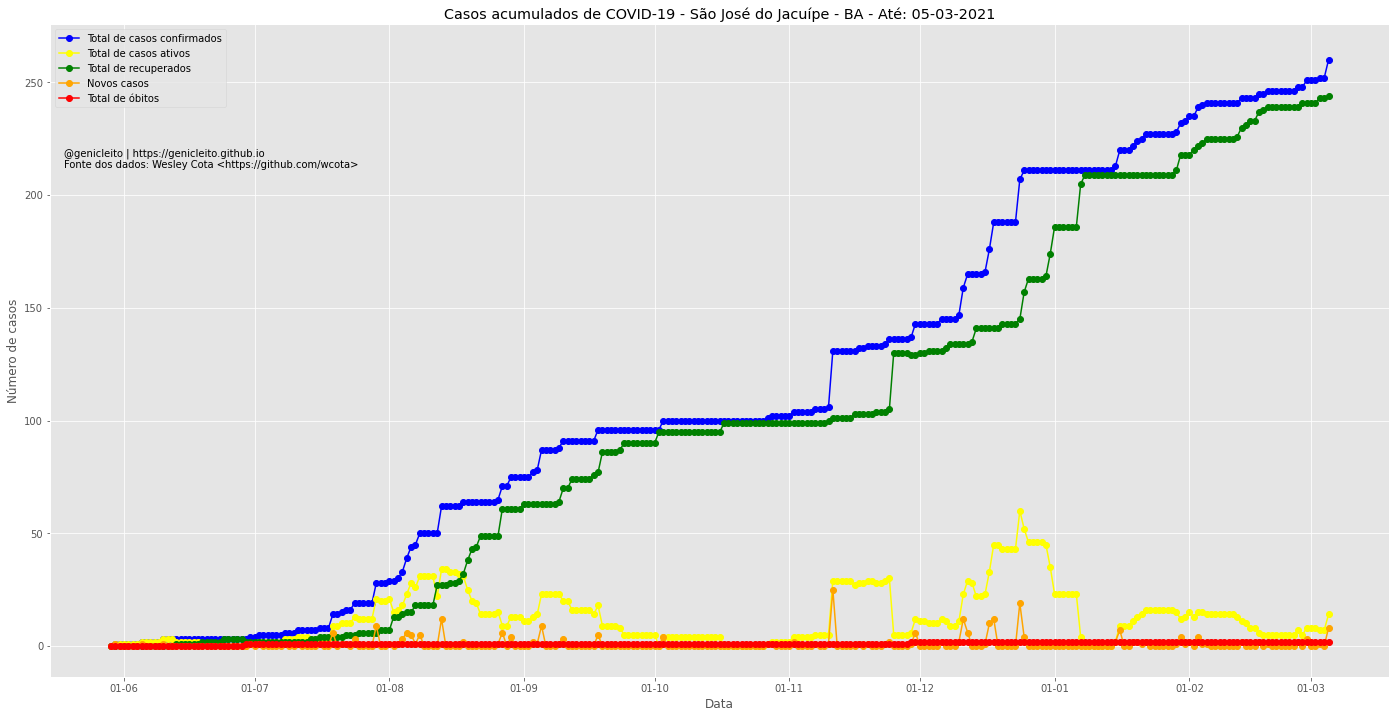



Tabela com medidas dos dados históricos da COVID-19 em São José do Jacuípe


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,100,9,95,1,0
Máximo,260,60,244,2,25








Dados históricos da COVID-19 no município de Várzea da Roça


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


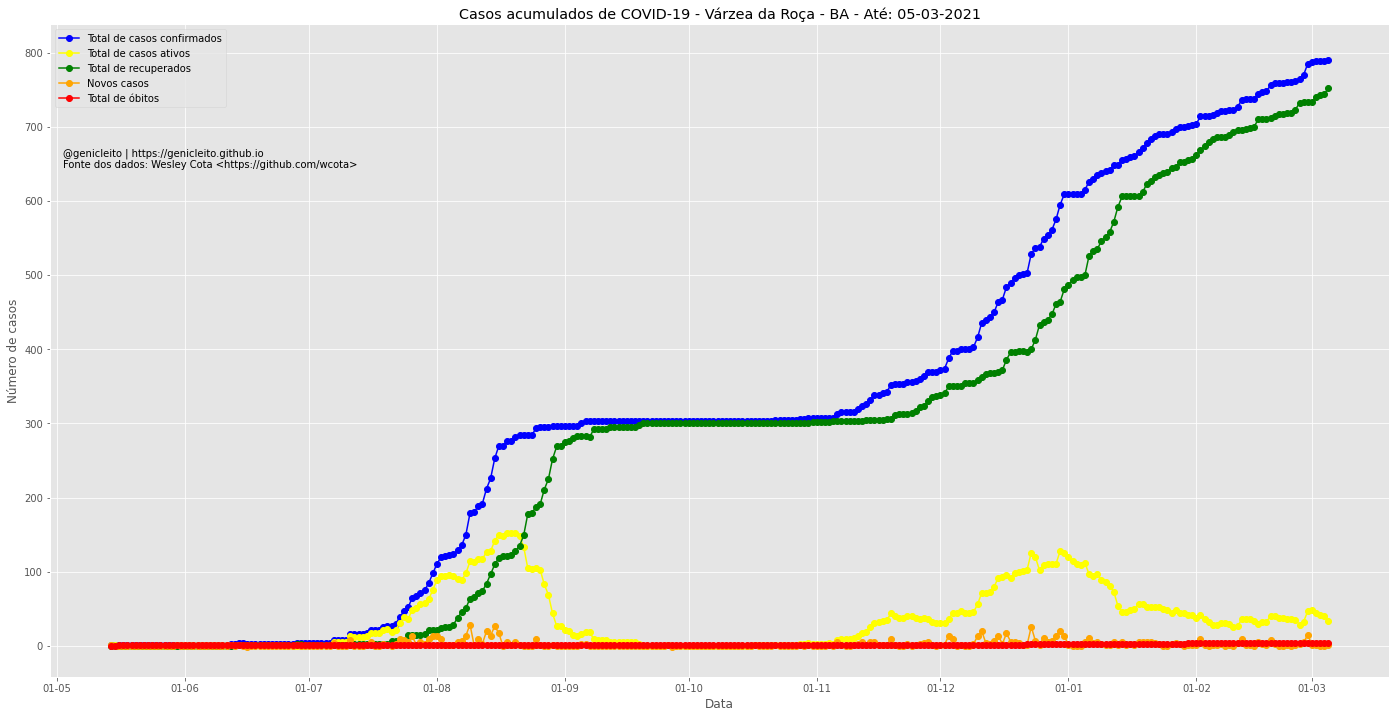



Tabela com medidas dos dados históricos da COVID-19 em Várzea da Roça


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,303,27,301,2,0
Máximo,790,153,752,4,29








Dados históricos da COVID-19 no município de Várzea do Poço


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


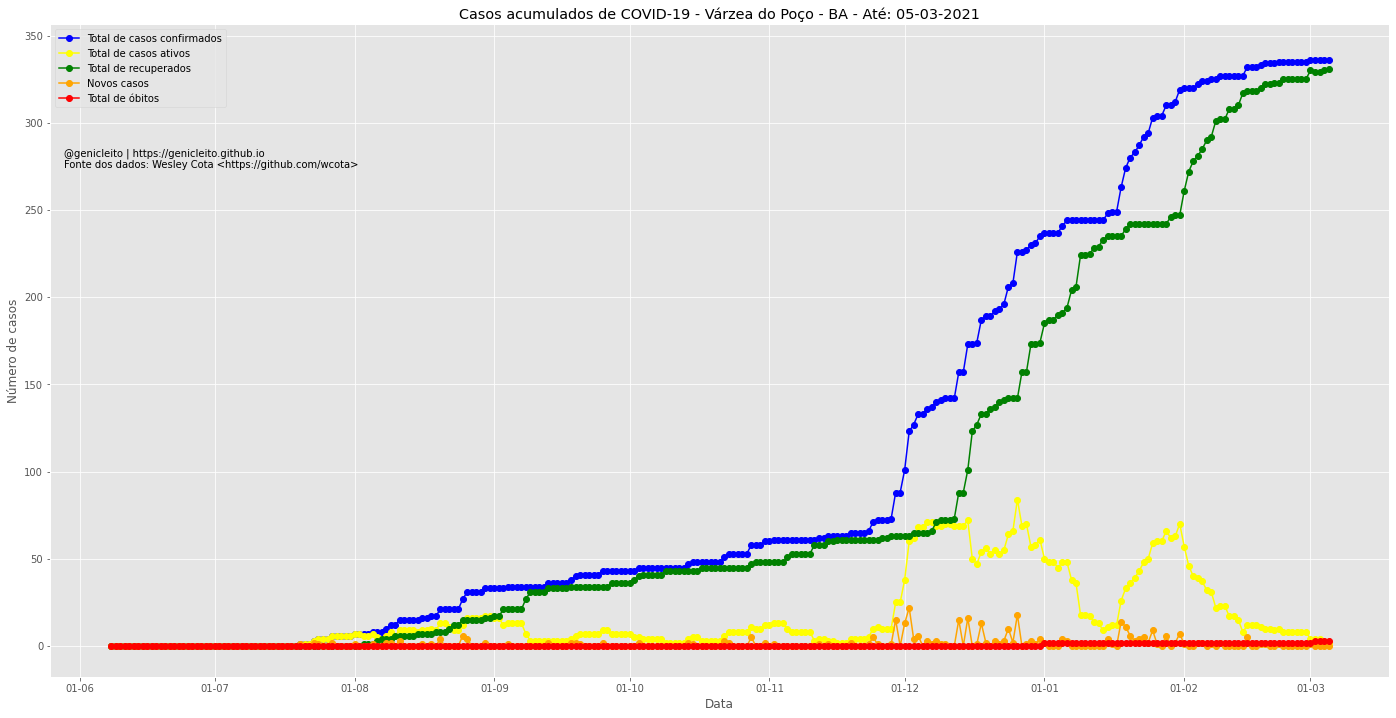



Tabela com medidas dos dados históricos da COVID-19 em Várzea do Poço


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,48,8,45,0,0
Máximo,336,84,331,3,22


In [21]:
for city in df_bj['city'].sort_values().unique():
    tmp = df_bj[df_bj['city'] == city]
#     tmp = tmp.assign(movingAverage7=tmp['totalCases'].rolling(7).mean().fillna(0))
    print("\n\nDados históricos da COVID-19 no município de {}".format(city))
    plot(tmp, city=city)
    print("\n\nTabela com medidas dos dados históricos da COVID-19 em {}".format(city))
    display.display(tmp[columns_to_describe].describe().loc[['50%', 'max'], :].rename(index={'50%': 'Mediana', 'max': "Máximo"}, columns={'totalCases': 'Confirmados', 'activeCases': 'Casos ativos', 'recoveredCases': 'Recuperados', 'newCases': 'Novos casos', 'deaths': 'Óbito por município de residência'}).astype(int))
    print("\n\n\n")

### Referências:
* [1] **SESAB** - Boletins Epidemiológicos – Covid-19: http://www.saude.ba.gov.br/temasdesaude/coronavirus/boletins-diarios-covid-19/
* [2] **Wesley Cota** - https://wesleycota.com/
* [3] **IBGE** - Bases Cartográficas - Malhas digitais: https://mapas.ibge.gov.br/bases-e-referenciais/bases-cartograficas/malhas-digitais